# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Global Settings
matplotlib.rcParams['figure.dpi'] = 150
colors = ['#436850', '#E8C872', '#944E63','#FC6736','#637A9F','#561C24']

Let's see our dataset !

In [2]:
# Load the dataset
df = pd.read_csv('product_sales.csv')
df.sample(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1156,6,Call,c7d8d526-ad56-4fe1-906e-e3bd6a843738,13,66.33,6,29,Pennsylvania
4167,1,Call,a83c91d0-accb-4d63-9c5f-51b7711282f2,7,35.15,4,18,Indiana
12844,1,Email,6d8eb8ef-187b-4987-aa75-f96dfe7865c4,9,85.83,1,22,Pennsylvania
3953,5,Call,cf06f298-9258-4e64-ac1f-f19797726e30,10,52.17,2,27,Indiana
2203,4,Email,7b85ccd1-66ba-4d35-bcef-89ba4c97d922,11,111.25,2,27,Ohio
7323,3,Email,d1c9549f-8653-443c-bc06-272d017902fe,9,86.27,1,30,Colorado
9136,5,Email + Call,03216fed-d2f2-4054-bcec-8ddac7ab00ad,13,189.86,4,26,Maryland
5015,3,Call,6dd12791-7b9d-4dfc-878b-6e0984f67d4c,8,41.46,12,20,Mississippi
862,5,Email,54a5ed94-412d-4690-8a0c-e29b67769979,12,117.88,12,23,Missouri
11089,4,Call,8a75246d-727a-418d-a559-1f355460a101,11,54.52,9,27,Washington


In [3]:
#Check for all non-null values and verifying data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
# view unique values in sales_method
print(df.sales_method.unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']


There are separate columns labeled 'Email' and 'email,' as well as columns with similar names such as 'Email + Call' and 'em + call.' In order to ensure the integrity and consistency of the data, it may be beneficial to consolidate these duplicates and standardize the formatting of these columns.

In [5]:
# correct sales_method misspilled values
df.loc[df.sales_method=='em + call', 'sales_method'] = 'Email + Call'
df.loc[df.sales_method=='email', 'sales_method'] = 'Email'

In [6]:
# a count of sales_method
df.sales_method.value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [7]:
# view unique values in state
print(df.state.unique())

['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']


In [8]:
# Check columns for any missing values
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [9]:
# find the null values deeper
counts_method = df.sales_method.value_counts(dropna=False)
null_revenue = df.groupby('sales_method')['revenue'].count().reindex(counts_method.index)
null_counts = pd.concat([counts_method, null_revenue], axis=1).assign(NaNs=counts_method-null_revenue)
null_counts.assign(NaNs_pct=round(null_counts.NaNs/null_counts.sales_method, 2))

,sales_method,revenue,NaNs,NaNs_pct
Email,7466,6922,544,0.07
Call,4962,4781,181,0.04
Email + Call,2572,2223,349,0.14


Based on the overview provided, it's evident that the revenue column contains 1,074 missing values. If the Sales methods column for each has null values in the revenue column that are less than or equal to 15% (0.15), my approach will involve straightforward removal of those specific rows.

In [10]:
# Removing missing values from all columns
df.dropna(inplace=True)

In [11]:
# dataframe description post-corrections
df.describe(include='all').T.fillna('')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
week,13926.0,,,,3.078271,1.65065,1.0,1.0,3.0,4.0,6.0
sales_method,13926.0,3,Email,6922,,,,,,,
customer_id,13926.0,13926,3998a98d-70f5-44f7-942e-789bb8ad2fe7,1,,,,,,,
nb_sold,13926.0,,,,10.040069,1.78969,7.0,9.0,10.0,11.0,16.0
revenue,13926.0,,,,93.934943,47.435312,32.54,52.47,89.5,107.3275,238.32
years_as_customer,13926.0,,,,4.97896,5.047828,0.0,1.0,3.0,7.0,63.0
nb_site_visits,13926.0,,,,24.947006,3.491491,12.0,23.0,25.0,27.0,37.0
state,13926.0,50,California,1739,,,,,,,


In [12]:
# Checking unique values in 'customer_id' column
df['customer_id'].value_counts()

3998a98d-70f5-44f7-942e-789bb8ad2fe7    1
e86c5916-467b-4506-9a49-6b2a532da5d4    1
aa81e824-0230-4ca0-8a93-05671cb2887d    1
a4c0db94-6109-4ec3-9cd9-7d038b0ef379    1
1f1f4b36-52d7-4978-97da-dff202225488    1
                                       ..
5ef8a0c6-46e3-46c7-8636-f491ce0bb171    1
eca998e8-1cc7-40b7-ba29-4605c5a7cf64    1
d7ecbcbf-7c52-46a4-8519-15ede0645cfd    1
94bca04f-f872-4a57-abc2-5a6d0f44cf62    1
e4dad70a-b23b-407c-8bd3-e32ea00fae17    1
Name: customer_id, Length: 13926, dtype: int64

In [13]:
# Drop the customer ID column
df = df.drop(columns='customer_id')

The 'customer_id' column has been dropped as it does not contribute to the current analysis.

In [14]:
# Check for customers that have been customers for more than 40 years (1984-2024)
longest_time_customers = df[df['years_as_customer'] >= 40]
longest_time_customers

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,10,97.22,63,24,California
13800,4,Call,10,50.47,47,27,California


In [15]:
# Dropping rows that are outliers i.e longer than 40 'years_as_customer'
df.drop(df[df['years_as_customer'] >= 40].index, axis=0, inplace=True)

I noticed some discrepancies where certain customers had joined before the founding year of our company, which dates back to 1984. Specifically, there were two instances recorded in years 47 and 63 that appeared to be outliers and will require further investigation. Consequently, these anomalous records have since been eliminated from the dataset.

In [16]:
# Number of States
df['state'].nunique()

50

In [17]:
# Verify unique values in 'state' column
df['state'].value_counts()

California        1737
Texas             1109
New York           899
Florida            826
Illinois           576
Pennsylvania       553
Ohio               520
Michigan           466
Georgia            460
North Carolina     430
New Jersey         402
Virginia           346
Indiana            327
Washington         309
Tennessee          308
Arizona            295
Missouri           286
Massachusetts      270
Maryland           245
Wisconsin          235
Minnesota          228
Oregon             214
Louisiana          213
South Carolina     213
Colorado           212
Alabama            202
Kentucky           202
Oklahoma           184
Connecticut        167
Iowa               154
Mississippi        133
Kansas             129
Arkansas           118
Utah               115
Nevada              97
Nebraska            86
New Mexico          79
West Virginia       77
Hawaii              67
Maine               60
Idaho               59
New Hampshire       48
Montana             43
Rhode Islan

In [18]:
# Verify the rows and columns count
df.shape

(13924, 7)

Original dataset consisted of 15000 rows and 8 columns; after cleansing, the updated dataset contains 13924 rows and 7 columns, with 1076 rows removed and 1 column eliminated

# Exploratory Analysis

## **How many customers were there for each approach?**

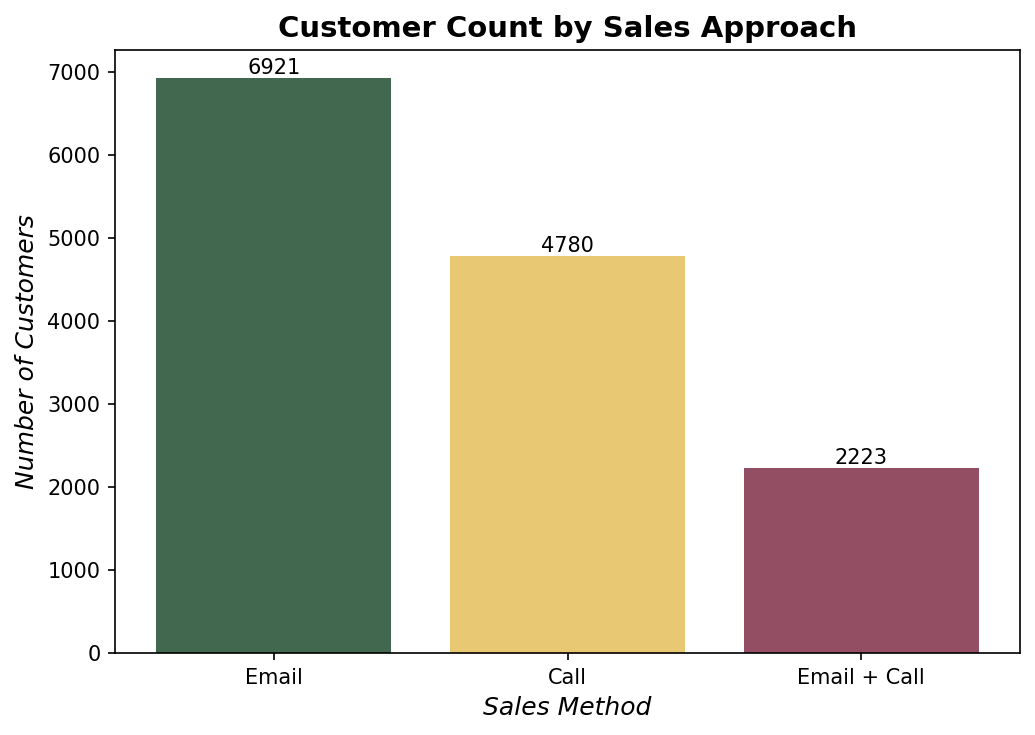

In [19]:
# Checking how many customers for each approach
customer_count_by_method = df['sales_method'].value_counts()

# Create figure and axes
fig, ax = plt.subplots(figsize=(7,5))

# Draw bars
bars = ax.bar(customer_count_by_method.index, customer_count_by_method.values, color=colors)

# Add labels and customize
ax.set_title('Customer Count by Sales Approach',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Sales Method',
              fontsize=12, fontstyle='italic')
ax.set_ylabel('Number of Customers',
              fontsize=12, fontstyle='italic')
ax.set_xticks(range(len(customer_count_by_method.index)))
ax.set_xticklabels(customer_count_by_method.index, rotation=0)

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', ha='center', va='bottom')

# Tighten layout
plt.tight_layout()
plt.show()

Overall, there were 13924 customers across the three sales methods. Email generated 6,922 more sales than other methods due to its low cost of use, followed by Call 4,781 and Email + Call 2,223. Email appears to be the most effective method based on the largest number of customers.

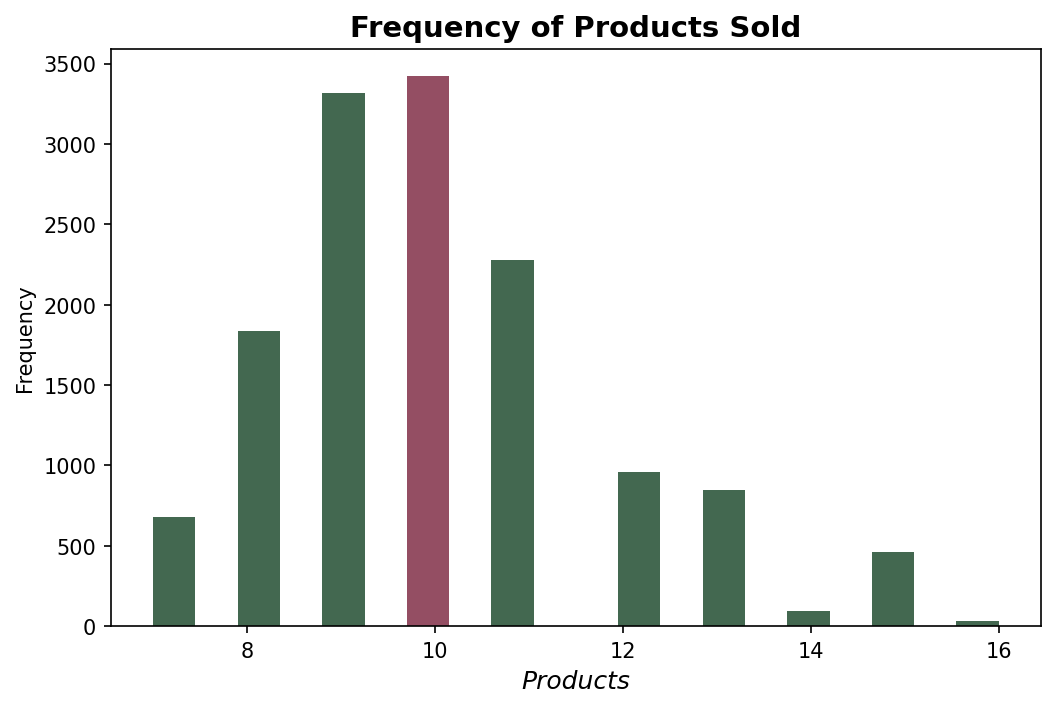

In [20]:
# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram with specified colors
ax = df.nb_sold.plot.hist(bins=20, color=colors)

# Find the bin with the highest frequency
highest_bin = df['nb_sold'].value_counts().idxmax()

# Annotate the highest bar with a different color
for p in ax.patches:
    if p.get_height() == df['nb_sold'].value_counts().max():
        p.set_facecolor('#944E63')

# Set labels and title
ax.set_title('Frequency of Products Sold', fontsize=14, fontweight='bold')
ax.set_xlabel('Products', fontsize=12, fontstyle='italic')

# Show the plot
plt.show()

Most products sold are bought together in groups between 9 and 12 products in each group. For example, most customers bought around 10 products.

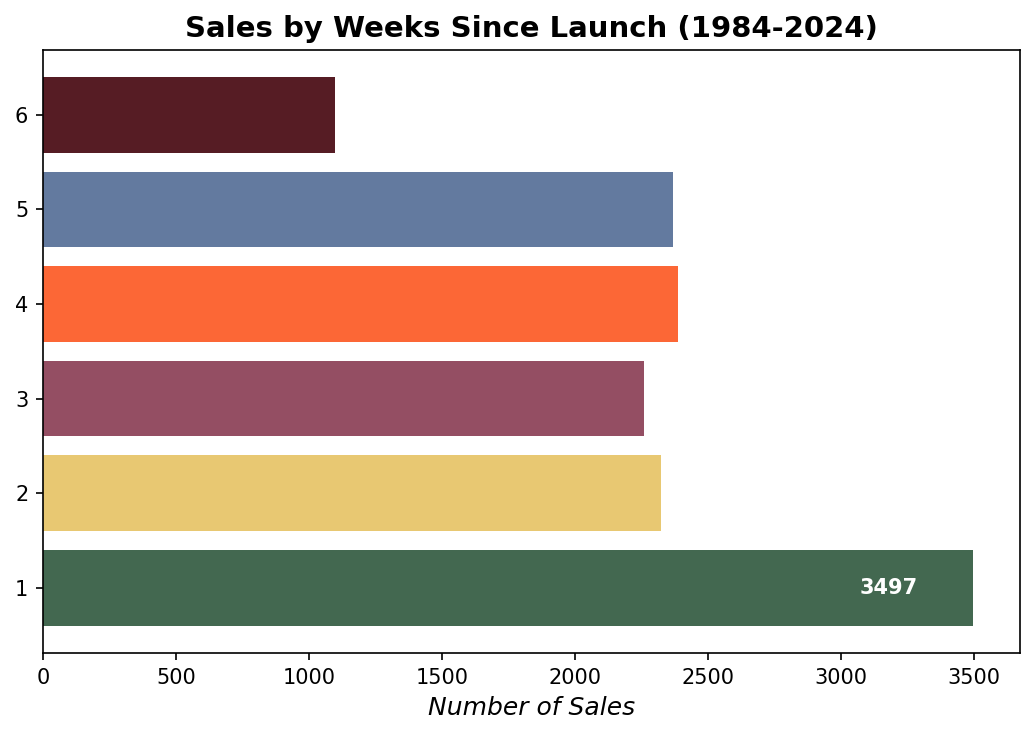

In [21]:
# Get count of sales by week
weeks = df['week'].value_counts().sort_index()

# Create bar chart
fig, ax = plt.subplots(figsize=(7,5))
ax.barh(range(len(weeks)), weeks.values, color=colors)

# Get bar widths
bar_widths = weeks.values

# Add value inside max bar
max_bar = max(bar_widths)
max_index = bar_widths.argmax()
ax.text(max_bar/1.1, max_index, str(max_bar), ha='center', va='center', color='w', fontweight='bold')

ax.set_yticks(range(len(weeks)))
ax.set_yticklabels(weeks.index)

ax.set_title('Sales by Weeks Since Launch (1984-2024)',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Sales',
              fontsize=12, fontstyle='italic')

plt.tight_layout()
plt.show()

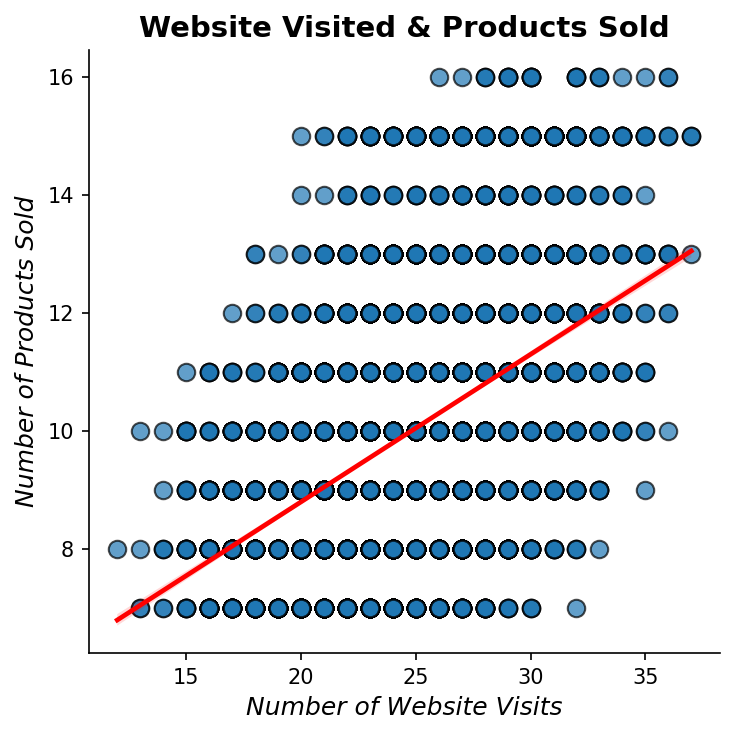

In [22]:
# plot a scatter plot with regression line for website visits and products sold
ax = sns.lmplot(df, x='nb_site_visits', y='nb_sold',
                line_kws={'color': 'red'}, scatter_kws={'s': 70, 'alpha': 0.7, 'edgecolor': 'k'})

ax.set_xlabels('Number of Website Visits',
               fontsize=12, fontstyle='italic')
ax.set_ylabels('Number of Products Sold',
               fontsize=12, fontstyle='italic')
plt.title('Website Visited & Products Sold',
          fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

There is a positive correlation between website visits and products sold. The more visits, the more products sold

## What does the spread of the revenue look like overall? And for each method?

In [23]:
# Creating the revenue_metrics
revenue_metrics = pd.DataFrame({
    "Number of Sales": [len(df)],
    "Mean Revenue": [df["revenue"].mean()],
    "Median Revenue": [df["revenue"].median()],
    "StdDev Revenue": [df["revenue"].std()],
    "Total Revenue": [df["revenue"].sum()],
    "Revenue Range": [f"{df['revenue'].min():.2f} to {df['revenue'].max():.2f}"],
    "Median Products Sold": [df["nb_sold"].median()],
    "Median Years as Customer": [df["years_as_customer"].median()],
    "Years as Customer Range": [f"{df['years_as_customer'].min()} to {df['years_as_customer'].max()}"],
    "Median Site Visits": [df["nb_site_visits"].median()],
    "Site Visits Range": [f"{df['nb_site_visits'].min()} to {df['nb_site_visits'].max()}"]
})

# Transposing the DataFrame for better display
revenue_metrics = revenue_metrics.T
revenue_metrics.columns = ['Metrics']

# Display the updated DataFrame
display(revenue_metrics)

,Metrics
Number of Sales,13924
Mean Revenue,93.937828
Median Revenue,89.5
StdDev Revenue,47.437281
Total Revenue,1307990.32
Revenue Range,32.54 to 238.32
Median Products Sold,10.0
Median Years as Customer,3.0
Years as Customer Range,0 to 39
Median Site Visits,25.0


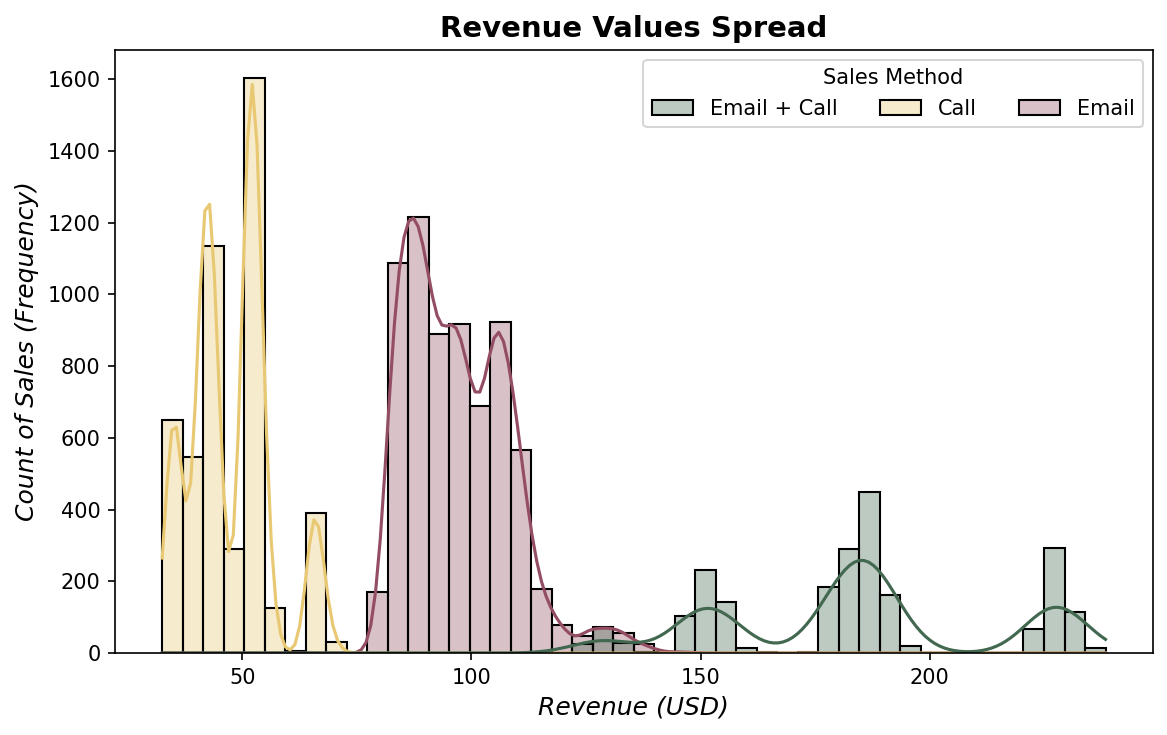

In [24]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# plot the density of revenue
ax = sns.histplot(data=df, x='revenue', hue='sales_method', fill=True,
                  common_norm=True, alpha=.35, linewidth=1, kde=True, palette=colors,
                  line_kws={'linewidth': 1.5, 'alpha': 1})

# Add labels and customize
ax.set_title('Revenue Values Spread',
            fontsize=14, fontweight='bold')
ax.set_xlabel('Revenue (USD)',
              fontsize=12, fontstyle='italic')
ax.set_ylabel('Count of Sales (Frequency)',
              fontsize=12, fontstyle='italic')
sns.move_legend(ax, "upper center",
                bbox_to_anchor=(.75, 1), ncol=3, title='Sales Method', frameon=True)

# Tighten layout
plt.tight_layout()
plt.show()

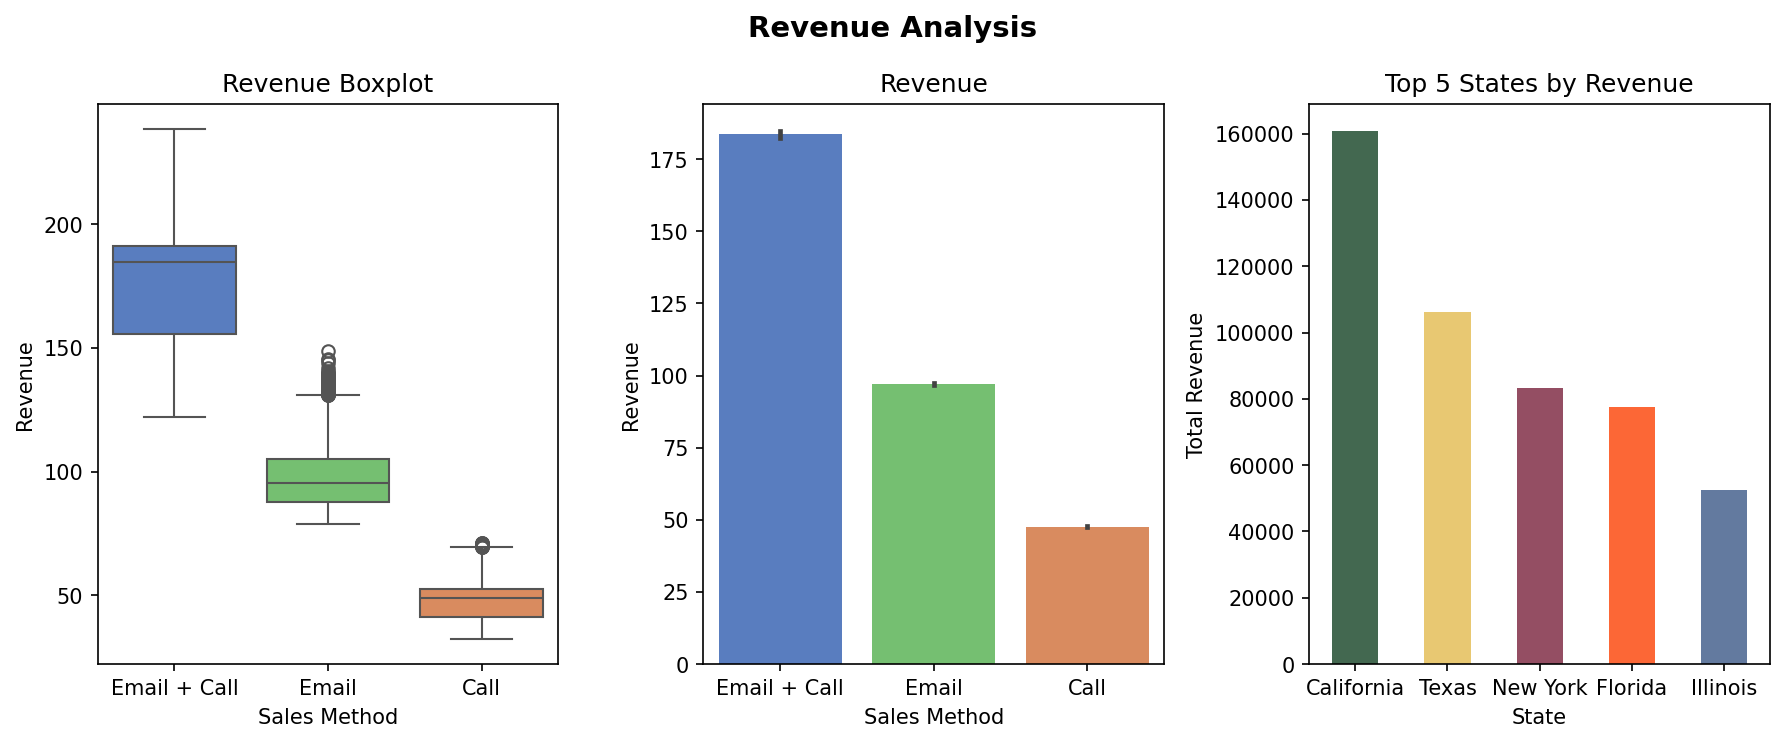

In [25]:
# Prepare data
order = ['Email + Call', 'Call', 'Email']
df['sales_method'] = df['sales_method'].astype('category')
df['sales_method'].cat.set_categories(order, inplace=True)
revenue_by_method = df.groupby('sales_method')['revenue'].sum()
top_states = df.groupby('state')['revenue'].sum().nlargest(5)

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# Sort by median for boxplot and barplot
median_order = df.groupby('sales_method')['revenue'].median().sort_values().index[::-1]

# Boxplot
sns.boxplot(data=df, x='sales_method', y='revenue', ax=ax1, order=median_order, hue='sales_method', palette='muted')
ax1.set(title='Revenue Boxplot', ylabel='Revenue')
ax1.set_xlabel('Sales Method')

# Bar Plot with 'hue' parameter
sns.barplot(x='sales_method', y='revenue', data=df, ax=ax2, order=median_order, hue='sales_method', palette='muted')
ax2.set(title='Revenue')
ax2.set_xlabel('Sales Method')
ax2.set_ylabel('Revenue')

# Top States Plot
top_states.plot.bar(ax=ax3, title='Top 5 States by Revenue', color=colors)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.set_xlabel('State')
ax3.set_ylabel('Total Revenue')

# Final touches
fig.suptitle('Revenue Analysis', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

In [26]:
# the IQR of each method's revenue
from scipy.stats import iqr

call = df.loc[df.sales_method=='Call', 'revenue']
email = df.loc[df.sales_method=='Email', 'revenue']
email_call = df.loc[df.sales_method=='Email + Call', 'revenue']

print('Call IQR: ', iqr(call))
print('Email IQR: ', iqr(email))
print('Email + Call IQR: ', iqr(email_call))

Call IQR:  11.21
Email IQR:  17.290000000000006
Email + Call IQR:  35.33500000000001


The revenue values show a right-skewed distribution, with most observations falling between \$32.54 and \$238.32. The median revenue of \$89.50 is lower than the mean of \$93.62, indicating the presence of high value outliers. The histogram shows decreasing bin counts in the tails, and the box plot confirms outliers. This suggests a few high revenue values differ significantly from the majority.

Analyzing revenue by the three contact methods reveals:

Call: Narrowest spread and median. Interquartile range (IQR) of \$11.
Email: Second in spread and median. IQR of \$17.
Email + Call: Widest spread and highest median. IQR of \$35.
Though Email + Call is most financially rewarding, the Email-only method generates more total revenue due to higher usage. In contrast, the Call method significantly underperforms given its high costs and lower returns.

## **Was there any difference in revenue over time for each of the methods?**

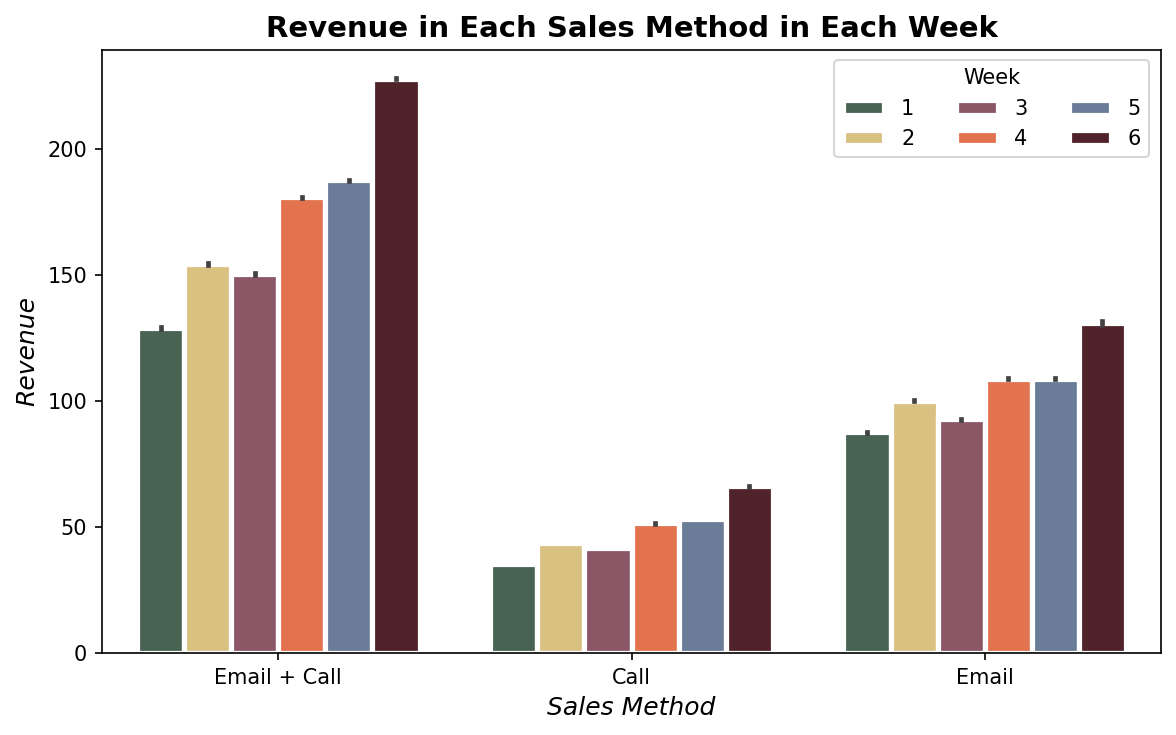

In [27]:
# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Bar plot of revenue in each sales method in each week with specified colors
sns.barplot(data=df, x="sales_method", y="revenue", hue="week", palette=colors, ax=ax,
            linewidth=2.5, edgecolor='white')

# Set labels and title
ax.set_xlabel("Sales Method", fontsize=12, fontstyle='italic')
ax.set_ylabel("Revenue", fontsize=12, fontstyle='italic')
ax.set_title("Revenue in Each Sales Method in Each Week", fontsize=14, fontweight='bold')
sns.move_legend(ax, "upper center", bbox_to_anchor=(.84, 1), ncol=3, title='Week', frameon=True)

# Show the plot
fig.tight_layout()
plt.show()

<Figure size 1500x900 with 0 Axes>

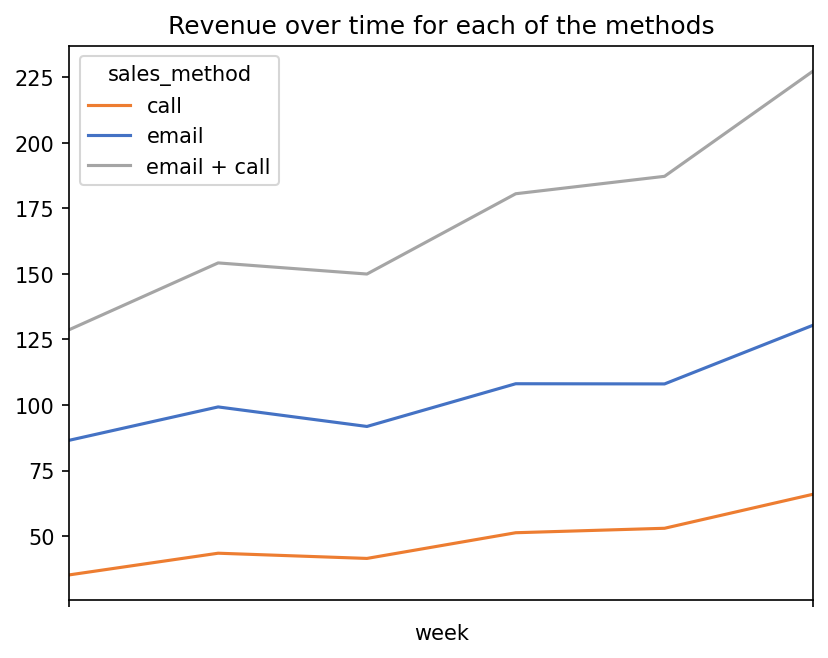

In [28]:
# Convert 'week' column to datetime object
df['week'] = pd.to_datetime(df['week'])

# Ensure 'sales_method' is in lower case
df['sales_method'] = df['sales_method'].str.lower()

# Group df by sales method and week, and sum the number of products sold
revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].median().unstack()

# Define color palette with lower case sales methods
colors = {'email': '#4472C4', 'call': '#ED7D31', 'email + call': '#A5A5A5'}

# Create a line plot
plt.figure(figsize=(10, 6))
revenue_over_time.plot(kind='line', color=[colors.get(i, '#000000') for i in revenue_over_time.columns])
plt.title('Revenue over time for each of the methods')
plt.show()

Based on the updated data, we can see that sales revenues by 'Email+Call' consistently increase over time. For the 'Call' method, there is a general upward trend in revenue, while the 'Email' method shows a more fluctuating pattern, with some increases and decreases in revenue. In the last week, all three methods experienced an increase in sales revenues, with 'Email+Call' having the most significant growth.

## **Based on the data, which method would you recommend we continue to use?**

Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

I recommend that the company continues to use the Email + Call method since it captures the most revenue with the potential to significantly increase over time

# Definition of a metric for the business to monitor

The company's goal is to earn higher revenue using the best sales method. I would recommend that the company uses the average revenue amount of their preferred sales method as their metric. Based on the data, Email + Call method has the highest sale revenue average \$183. This is while Email \$97 and Call \$47 have lower average revenue. If their preferred sales method is Email + Call, the sales team should use its revenue average \$183 as a baseline for whether a sale was more lucrative (above average) or not (below average).Moreover, the sales team should recognize that sale averages overall and weekly are different since sale averages increase every week. Importantly, the first weeks could have lower revenue average amount than \$183, for instance.

# **Final summary** **bold text**

1. The "Email + Call" method delivers the highest revenue overall, but requires more effort per sale.
2. The "Email" method generates lower total revenue, yet ranks highest in Sales Efficiency Index (SEI) and Adjusted SEI when accounting for effort. It is the most efficient method.
3. Revenues fluctuated over time for all methods. "Email + Call" showed significant growth, indicating its effectiveness during certain periods.
4. The data suggests varying customer engagement and success levels depending on sales method. Tailoring the approach to customer preferences is important.

## **Recommendations**

1. Prioritize the efficient "Email" method, especially when optimizing resources is crucial. It maximizes revenue per effort.
2. Use "Email + Call" strategically for high-value sales where the extra effort is justified by higher returns.
3. Continue using the Email + Call method since it generates the highest revenue and shows significant growth potential over time.
4. se the average revenue of the Email + Call method as a benchmark to monitor increasing sales.
5. Maintain the Email method for its low-cost implementation.
6. Reevaluate the "Call" method given its lower efficiency and revenue. Consider enhancements through training, scripts, or technology.
7. Consider discontinuing the Call method given its high cost (30 mins per customer) and low revenue.
8. Take a customer-centric approach, personalizing sales strategies to match segments' preferences and behaviors.
9. Continuously review strategies and metrics to adapt to changing conditions, needs, and goals.
10. Improve data collection to address missing revenue values (1,074 missing in dataset).